In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Data Creation

In [66]:
fundamental_freq = 8000
number_of_data_points = 100

sourse1_freq = np.random.uniform(0,fundamental_freq,number_of_data_points).reshape(-1,1)
sourse2_freq = np.random.uniform(fundamental_freq,2*fundamental_freq,number_of_data_points).reshape(-1,1)

sample_rate = 44100
timesteps = 10000

samples = np.linspace(0,timesteps/sample_rate , timesteps, endpoint=False)



sourse1_sin = np.sin(2*np.pi*sourse1_freq*samples)

sourse2_sin = np.sin(2*np.pi*sourse2_freq *samples)

mixed = sourse1_sin + sourse2_sin

# plt.plot(t,sinusiod1, 'r')
# plt.plot(t,sinusiod2, 'b')
# # plt.plot(mixed, 'g')
# wavfile.write('demo3.wav', 44100,mixed)

In [70]:
mixed.shape

(100, 10000)

<Figure size 1200x800 with 0 Axes>

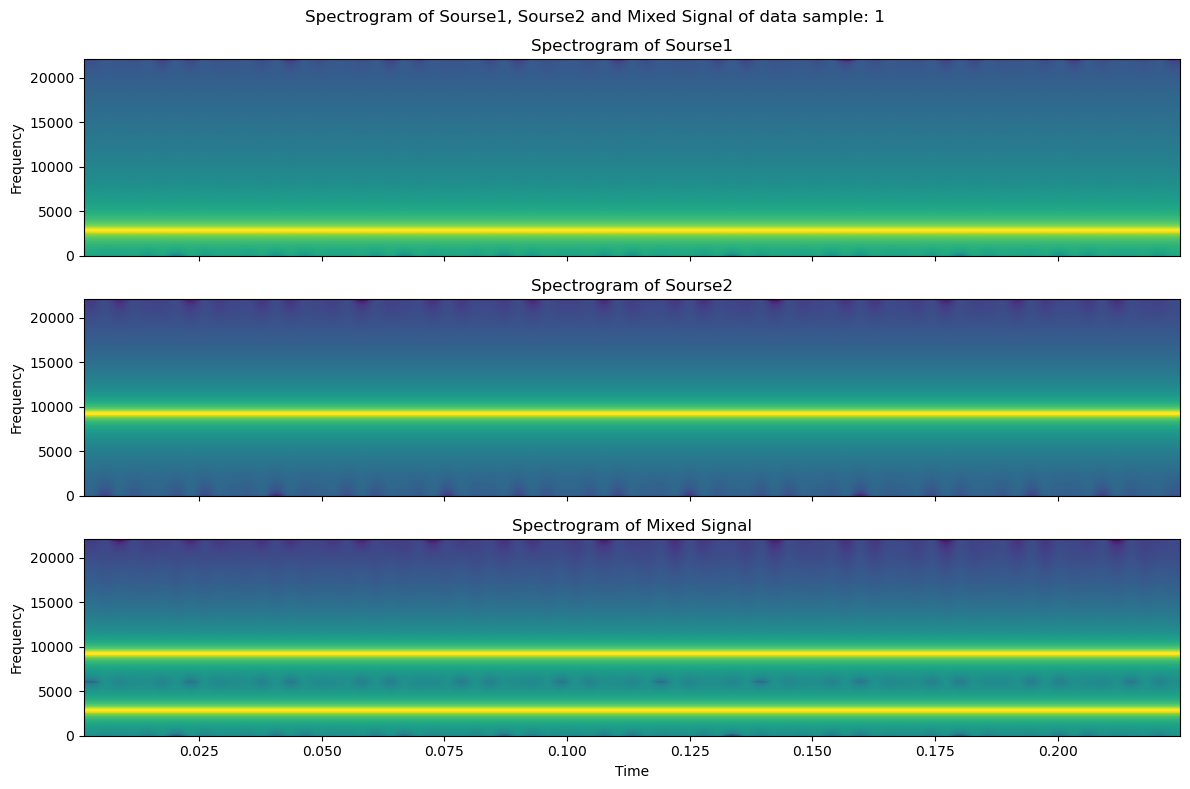

In [89]:
plt.figure(figsize=(12, 8))
data_sample = 1

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot spectrogram of sourse1
axs[0].specgram(sourse1_sin[data_sample].flatten(), Fs=sample_rate)
axs[0].set_title('Spectrogram of Sourse1')
axs[0].set_ylabel('Frequency')

# Plot spectrogram of sourse2
axs[1].specgram(sourse2_sin[data_sample].flatten(), Fs=sample_rate)
axs[1].set_title('Spectrogram of Sourse2')
axs[1].set_ylabel('Frequency')

# Plot spectrogram of mixed signal
axs[2].specgram(mixed[data_sample].flatten(), Fs=sample_rate)
axs[2].set_title('Spectrogram of Mixed Signal')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Frequency')
plt.suptitle(f'Spectrogram of Sourse1, Sourse2 and Mixed Signal of data sample: {data_sample}')
plt.tight_layout()
plt.show()


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class AudioDataset(Dataset):
    def __init__(self, mixed_signal, sourse1_signal, sourse2_signal):
        self.mixed_signal = mixed_signal
        self.sourse1_signal = sourse1_signal
        self.sourse2_signal = sourse2_signal

    def __len__(self):
        return len(self.mixed_signal)

    def __getitem__(self, idx):
        mixed = self.mixed_signal[idx]
        sourse1 = self.sourse1_signal[idx]
        sourse2 = self.sourse2_signal[idx]
        return mixed, sourse1, sourse2

# Assuming you have the following variables defined:
# mixed: ndarray containing mixed signals
# sourse1_sin: ndarray containing sourse1 signals
# sourse2_sin: ndarray containing sourse2 signals

# Create the dataset
dataset = AudioDataset(mixed, sourse1_sin, sourse2_sin)

# Set batch size and number of workers
batch_size = 32
num_workers = 4

# Create the dataloader
dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)


In [ ]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        
        return out

# Define the input size, hidden size, number of layers, and output size
input_size = 1  # Assuming the input is a single value
hidden_size = 64
num_layers = 2
output_size = 1  # Assuming the output is a single value

# Create an instance of the LSTM model
model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Print the model architecture
print(model)


In [35]:
import numpy as np
from scipy.io import wavfile

fs = 44100

f = 8000
t = 2

samples = np.linspace(0, t, int(fs*t), endpoint=False)

signal = np.sin(2 * np.pi * f * samples)

signal *= 32767

signal = np.int16(signal)

wavfile.write('demo.wav', fs, signal)

In [45]:
from scipy.io.wavfile import write
import numpy as np
samplerate = 44100; fs = 8000
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))